In [1]:
import pandas as pd
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt

Load Data

In [2]:
df_read = pd.read_csv('../input/mental-health-in-tech-field-eda-cleaning/main_dummy.csv')
df_read = df_read.drop('Unnamed: 0', axis = 1)
df_read

,What US state or territory do you work in?_midwest,What US state or territory do you work in?_northeast,What US state or territory do you work in?_south,What US state or territory do you work in?_west,What US state or territory do you live in?_midwest,What US state or territory do you live in?_northeast,What US state or territory do you live in?_south,What US state or territory do you live in?_west,What country do you work in?_other,What country do you live in?_other,...,executive leadership,supervisor/team lead,dev evangelist/advocate,devops/sysadmin,support,designer,one-person shop,other position,sales,age
0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,39
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,29
2,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,38
3,1,0,0,0,1,0,0,0,0,0,...,1,1,1,1,1,0,0,0,0,43
4,0,0,0,0,0,0,0,0,1,1,...,0,0,0,1,1,1,0,0,0,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,26
1132,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,38
1133,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,52
1134,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,30


# Get rid of unwanted columns 

In [3]:
#check col names
df_dummies = df_read.copy()
orig_col = list(df_dummies.columns.values)
for eachorig in orig_col:
    print(eachorig)

What US state or territory do you work in?_midwest
What US state or territory do you work in?_northeast
What US state or territory do you work in?_south
What US state or territory do you work in?_west
What US state or territory do you live in?_midwest
What US state or territory do you live in?_northeast
What US state or territory do you live in?_south
What US state or territory do you live in?_west
What country do you work in?_other
What country do you live in?_other
How many employees does your company or organization have?_100-500
How many employees does your company or organization have?_26-100
How many employees does your company or organization have?_500-1000
How many employees does your company or organization have?_6-25
How many employees does your company or organization have?_More than 1000
Is your employer primarily a tech company/organization?_1.0
Does your employer provide mental health benefits as part of healthcare coverage?_No
Does your employer provide mental health ben

In [4]:
print('original number of cols: ', len(orig_col))

#remove the diagnosis
diag_list = ['mood disorder', 'anxiety disorder', 'attention deficit disorder', 'substance use disorder', 'other diagnose']
for eachdiag in diag_list:
    orig_col.remove(eachdiag)
print('number of cols after removing diagnosis: ', len(orig_col))

#remove other columns with 'If you have a mental health issue'
remove_list = ["If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?_Not applicable to me", 
               "If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?_Often", 
               "If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?_Rarely", 
               "If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?_Sometimes", 
               "If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?_Not applicable to me", 
               "If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?_Often", 
               "If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?_Rarely", 
               "If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?_Sometimes", 
               "Have you been diagnosed with a mental health condition by a medical professional?_Yes", 
               'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?_Not applicable to me', 
               'How willing would you be to share with friends and family that you have a mental illness?_Not applicable to me (I do not have a mental illness)']
# remove_list = ['If yes, what condition(s) have you been diagnosed with?',
#                 'If maybe, what condition(s) do you believe you have?', 
#                 'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?_Not applicable to me', 
#                 'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?_Often', 
#                 'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?_Rarely', 
#                 'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?_Sometimes', 
#                 'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?_Not applicable to me', 
#                 'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?_Often', 
#                 'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?_Rarely', 
#                 'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?_Sometimes']
# for eachcol in orig_col:
#     if eachcol.find('If you')>-1:
#         print(eachcol)
#         orig_col.remove(eachcol)
for eachif in remove_list:
    if eachif in orig_col:
        orig_col.remove(eachif)
print('number of cols after removing if have mental issue: ', len(orig_col))

original number of cols:  137
number of cols after removing diagnosis:  132
number of cols after removing if have mental issue:  122


In [5]:
#create dataframe with the rest of the cols for modeling
df_dummies = df_dummies[orig_col]

# Whitening data

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
ss = StandardScaler()
# df_dummies['age'] = ss.fit_transform(np.array(df_dummies['age']).reshape(-1, 1))

# Prepare train and test sets

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
cols = df_dummies.columns.values
ycol = 'Do you currently have a mental health disorder?'
# not_x = ['If yes, what condition(s) have you been diagnosed with?',
#          'If maybe, what condition(s) do you believe you have?', 
#          'Do you currently have a mental health disorder?']
xcol = list()
for each in cols:
    if each != ycol:
        xcol.append(each)
y = df_dummies[ycol]
x = df_dummies[xcol]
col_test1 = x.columns.values
x_whiten = ss.fit_transform(x)
x = pd.DataFrame(x_whiten, columns = xcol)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [10]:
x.shape

(1136, 121)

Further split training and testing data for CV folds

In [11]:
n_fold = 5
x_folds = np.array_split(x_train, n_fold) #split training data into n_fold proportions
y_folds = np.array_split(y_train, n_fold) #split training data into n_fold proportions

cv_folds = list() #stores dataframes for each fold
for eachfold in range(n_fold): #for each fold
    train_number = list(np.arange(0, n_fold)) #a list of fold numbers
    train_number.pop(eachfold) #pop current fold number
    df_y_ts = y_folds[eachfold] #use current fold number as testing fold, create testing y
    df_x_ts = x_folds[eachfold] #use current fold number as testing fold, create testing x
    
    y_train_list = list() #stores all the df y from folds for training
    x_train_list = list() #stores all the df x from folds for training
    for eachnumber in train_number: #for each training fold number
        x_train_list.append(x_folds[eachnumber]) #append the df in training fold number for x
        y_train_list.append(y_folds[eachnumber]) #append the df in training fold number for y
    df_x_tr = pd.concat(x_train_list) #combine all the training dfs for x into 1
    df_y_tr = pd.concat(y_train_list) #combine all the training dfs for y into 1
    cv_folds.append([df_x_tr, df_y_tr, df_x_ts, df_y_ts]) #append training and testing dataframe for current fold
    
    
# x_trtr, x_trts, y_trtr, y_trts = train_test_split(x_train, y_train, test_size = 0.2, random_state = 0)
# x_tr_folds = np.array_split(x_trtr, n_fold)
# y_tr_folds = np.array_split(y_trtr, n_fold)
# x_ts_folds = np.array_split(x_trts, n_fold)
# y_ts_folds = np.array_split(y_trts, n_fold)

# Feature Selection

In [12]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
import scipy.stats

chi test and p value between x and y

In [13]:
# #chi test and p value test
# chi, pval = chi2(x, y)
# df_chi_p = pd.DataFrame({'Feature':xcol, 'p value':pval, 'chi2':chi})
# # print(df_pval[df_pval['p value']<0.0001])
# low_p = df_chi_p.loc[df_chi_p['p value']<0.0001, 'Feature']

In [14]:
# #sort by chi2 values
# sort_chi = df_chi_p.sort_values(by = 'chi2')
# sort_chi

In [15]:
# #sort by p
# sort_p = df_chi_p.sort_values(by = 'p value', ascending = False)
# print(list(sort_p.index) == list(sort_chi.index))
# #sorting by p or chi gives the same result

chi2 test

In [16]:
# #plot scatter plot of all chi2 values
# plt.scatter(sort_chi.index, sort_chi['chi2'])
# plt.xlabel('feature index')
# plt.ylabel('chi2 value')
# plt.title('Chi2 vs Feature')
# plt.show()
# ##there are features that have chi2 values much higher than other ones

In [17]:
# #check which features have high chi2 values
# high_chi = list(df_chi_p.loc[df_chi_p['chi2']> 50, 'Feature'])
# higher_chi = list(df_chi_p.loc[df_chi_p['chi2']> 100, 'Feature'])
# print('chi2 above 100:')
# for eachhigher in higher_chi:
#     print(eachhigher)
# print('\nfeatures in high but not in higher: ')
# for eachhigh in high_chi:
#     if eachhigh not in higher_chi:
#         print(eachhigh)

In [18]:
# for each in df_dummies.columns:
#     if each.find(
#         'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?') > -1:
#         print(each)

In [19]:
# df_chi_p[df_chi_p['chi2']> 50]

In [20]:
# #personality disorder not in the high range
# df_chi_p[df_chi_p['Feature'] == 'other diagnose']

In [21]:
# #critical value
# critical = scipy.stats.chi2.ppf(1-.00005, df = (x.shape[1]-1)*(x.shape[0]-1))
# # plt.scatter(sort_chip)

In [22]:
# #use chi test to select features
# print(x.shape)
# x_new = SelectKBest(chi2, 30).fit_transform(x, y)
# # new_low_p = x_new.columns
# print(x_new)

chi test and p value between features

In [23]:
# #calculate chi2 and p between each col and other cols
# x_chi2 = list() #store lists of chi2
# x_p = list() #store lists of p values
# col_outlier = list() #store lists of columns that are correlated

# for eachxcol in range(len(xcol)): #for each col
    
#     #get chi2 and p values
#     other_col = list(x.columns.values) #get all the column names
#     other_col.pop(eachxcol) #pop the current col name
#     current_col = xcol[eachxcol] #let the current col name be the col to compare with other cols
#     x_current = np.array(x[current_col]).reshape(x.shape[0], 1) #reshape current column from (x.shape[0], ) to (x.shape[0], 1) for chi2 function
#     chi_x, p_x = chi2(x[other_col], x_current) #calculate chi2 between other cols and current col
#     x_chi2.append(chi_x) #append chi2 results
#     x_p.append(p_x) #append p results 
    
#     #compare with critical value
#     current_crit = scipy.stats.chi2.ppf(1-.00005, df = (len(other_col)-1)*(x.shape[0]-1)) #calculate critical value
#     for eachchi in chi_x: #for each chi2 value
#         if current_crit < eachchi: #if chi2 value smaller than critical value
#             print('There is a significant relation between ', x_current, 'and other cols') # hypothesis rejected, there is significant relation

#     #investigate chi2 outliers 
# #     z = list(abs(scipy.stats.zscore(chi_x))) #get absolute values of the z scores
# # #     print('\ncurrent column is: ', current_col)
# #     current_outlier = list()
# #     for eachz in z: #for each z score of current column
# #         if eachz>3: #if z score is greater than 3, i.e. an outlier
# #             outlier = other_col[z.index(eachz)] #find feature name of outlier
# #             question_current = current_col.find('_')
# #             question_outlier = outlier.find('_')
# #             if question_current>-1:
# #                 question_current = current_col[:question_current]
# #                 if question_outlier>-1:
# #                     question_outlier = outlier[:question_outlier]
# #                     if question_outlier != question_current:
# #                         current_outlier.append(outlier)
# # #                         print('\ncurrent column is: ', current_col)

# # #                         print(outlier, eachz)
# #     col_outlier.append(current_outlier)
# #     col_outlier = other_col[z[z>3].index()]
# #     print('outlier for feature ', current_col, ': ', col_outlier)
# #     if eachxcol < 5:
# #         plt.scatter(range(len(other_col)), chi_x)
# #         plt.xlabel('other columns')
# #         plt.ylabel('chi2 values')
# #         plt.title('chi2 values between '+current_col+' and other cols')
# #         plt.show()

PCA

In [24]:
from sklearn.decomposition import PCA

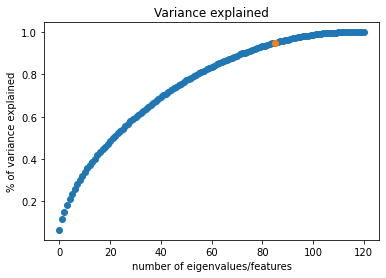

number of eigenvalues above 0.95:  85 0.9505490214013462


In [25]:
#calculate variance explained
var_exp_list = list() #store variance explained for n features/eigenvalues
for ncomp in range(1, x.shape[1]+1): #for each number of features/eigenvalues
    pca_comp = PCA(n_components = ncomp) #set the number of components wanted for pca
    pca_comp.fit(x)
    var_exp = sum(pca_comp.explained_variance_ratio_) #sum the variance explained of each component to get total variance explained
    var_exp_list.append(var_exp) #append total variance explained in list
    
#plot variance explained
plt.scatter(range(x.shape[1]), var_exp_list) #plot variance explained against number of features
plt.xlabel('number of eigenvalues/features')
plt.ylabel('% of variance explained')
plt.title('Variance explained')

#find the good number of eigenvalues
for eachvar in var_exp_list:
    if eachvar>0.95:
        good_var = eachvar
        break
good_n_eigen = var_exp_list.index(good_var)
plt.scatter(good_n_eigen, good_var)
plt.show()
print('number of eigenvalues above 0.95: ', good_n_eigen, good_var)

In [26]:
#get newly generated components
pca_best = PCA(n_components = good_n_eigen)
pca_best.fit(x)
pca_features = pca_best.fit_transform(x)
single_best = pca_best.singular_values_
df_pca = pd.DataFrame(pca_features, columns = list(range(good_n_eigen)))
print(df_pca.shape)

(1136, 85)


In [27]:
# pca_2 = PCA(n_components = 2)
# pca.fit(x)
# principal_comps = pca.fit_transform(x)
# df_principal = pd.DataFrame(principal_comps, columns = x.columns.values)
# # print(principal_comps.shape)
# principal_var = pca.explained_variance_
# principal_val = pca.singular_values_
# print(principal_val)
#plotting
# fig = plt.figure()
# ax = fig.add_subplot(111)
# plt.scatter(df_principal['pc1'], df_principal['pc2'])
# var_pri1_max = max(df_principal['pc1'])
# var_pr1_min = min(df_principal['pc1'])
# var_pri2_max = max(df_principal['pc2'])
# var_pr2_min = min(df_principal['pc2'])
# col_pri1_max = x.columns[list(df_principal['pc1']).index(var_pri1_max)]
# col_pri1_min = x.columns[list(df_principal['pc1']).index(var_pri1_min)]
# col_pri2_max = x.columns[list(df_principal['pc2']).index(var_pri2_max)]
# col_pri2_min = x.columns[list(df_principal['pc2']).index(var_pri2_min)]
# print(col_pri1_max, col_pri1_min, col_pri1_max, col_pri2_min)

random forest

In [28]:
#use random forest to select features
n_trees = np.arange(10, 110, 10)
depth = [2, 5, 10, 20, 30, 40, 50, 100]
accuracy = list()

for eachn in n_trees:
    acc_n = list()
    for eachd in depth:
        acc_d = list()
        for eachfold in cv_folds:
            x_tr_fold = eachfold[0]
            y_tr_fold = eachfold[1]
            x_ts_fold = eachfold[2]
            y_ts_fold = eachfold[3]
            rf = RandomForestClassifier(n_estimators = eachn,
                                       max_depth = eachd, 
                                       bootstrap = True, 
                                       random_state = 0)
            rf.fit(x_tr_fold, y_tr_fold)
            acc_d.append(rf.score(x_ts_fold, y_ts_fold))
        acc_n.append(mean(acc_d))
    accuracy.append(acc_n)

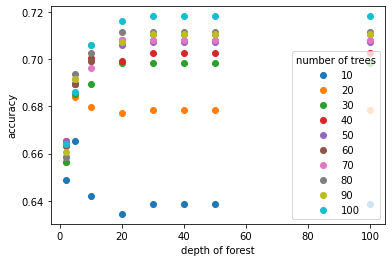

the highest accuracy is:  0.7180984761095258 
best number of trees is:  100 
best forest depth is:  30


In [29]:
#plot results
tree_acc_list = list()
for eachacc in range(len(accuracy)):
    plt.scatter(depth, accuracy[eachacc], label = n_trees[eachacc])
    tree_acc_list.append(max(accuracy[eachacc]))
plt.legend(title = 'number of trees')
plt.xlabel('depth of forest')
plt.ylabel('accuracy')
plt.show()

#find the best number of trees and depth
best_acc = max(tree_acc_list)
best_n = n_trees[tree_acc_list.index(best_acc)]
best_n_list = accuracy[tree_acc_list.index(best_acc)]
best_d = depth[best_n_list.index(best_acc)]
print('the highest accuracy is: ', best_acc, '\nbest number of trees is: ', best_n, '\nbest forest depth is: ', best_d)

In [30]:
# acc_n = accuracy[6:9]
# count = 6
# for eachn in acc_n:
#     plt.scatter(depth[3:6], eachn[3:6], label = n_trees[count])
#     count += 1
# plt.legend(title = 'number of trees')
# plt.xlabel('depth of forest')
# plt.ylabel('accuracy')
# plt.show()


In [31]:
#investigate new range of ntree and depth
n_trees_s = np.arange(95, 106)
depth_s = np.arange(20, 41)
accuracy_s = list()

for eachns in n_trees_s:
    acc_ns = list()
    print(eachns)
    for eachds in depth_s:
        acc_ds = list()
        for eachfold in cv_folds:
            x_tr_fold = eachfold[0]
            y_tr_fold = eachfold[1]
            x_ts_fold = eachfold[2]
            y_ts_fold = eachfold[3]
            rf = RandomForestClassifier(n_estimators = eachns,
                                       max_depth = eachds, 
                                       bootstrap = True, 
                                       random_state = 0)
            rf.fit(x_tr_fold, y_tr_fold)
            acc_ds.append(rf.score(x_ts_fold, y_ts_fold))
        acc_ns.append(mean(acc_ds))
    accuracy_s.append(acc_ns)

95
96
97
98
99
100
101
102
103
104
105


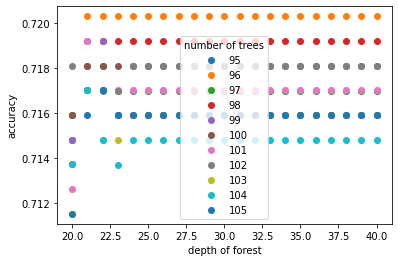

the highest accuracy is:  0.7203023495841175 
best number of trees is:  96 
best forest depth is:  21


In [32]:
#plot results
best_acc_d = list()
for eachacc in range(len(accuracy_s)):
    plt.scatter(depth_s, accuracy_s[eachacc], label = n_trees_s[eachacc])
    best_acc_d.append(max(accuracy_s[eachacc]))
plt.legend(title = 'number of trees')
plt.xlabel('depth of forest')
plt.ylabel('accuracy')
plt.show()

#get the best accuracy, number of trees and depth
best_acc = max(best_acc_d)
best_n = n_trees_s[best_acc_d.index(best_acc)]
best_n_list = accuracy_s[best_acc_d.index(best_acc)]
best_d = depth_s[best_n_list.index(best_acc)]
print('the highest accuracy is: ', best_acc, '\nbest number of trees is: ', best_n, '\nbest forest depth is: ', best_d)

In [33]:
best_rf = RandomForestClassifier(n_estimators = best_n, 
                                 max_depth = best_d, 
                                 random_state = 0)
best_rf.fit(x_train, y_train)
select_feature = SelectFromModel(best_rf, prefit=True)
x_new = select_feature.transform(x)
print('original number of features: ', x.shape[1], '\nnumber of selected features: ', x_new.shape[1])
feature_index = select_feature.get_support()
feature_name = list(x.columns[feature_index])
print(feature_name)
# importances = best_rf.feature_importances_
# indices = np.argsort(importances)[::-1]

# # Print the feature ranking
# print("Feature ranking:")

# for f in range(x.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

original number of features:  121 
number of selected features:  21
['What country do you live in?_other', 'Does your employer provide mental health benefits as part of healthcare coverage?_Yes', 'Do you know the options for mental health care available under your employer-provided coverage?_No', 'Do you know the options for mental health care available under your employer-provided coverage?_Yes', 'Do you feel that your employer takes mental health as seriously as physical health?_No', 'Would you have been willing to discuss a mental health issue with your previous co-workers?_Some of my previous employers', 'Did you feel that your previous employers took mental health as seriously as physical health?_None did', 'Would you be willing to bring up a physical health issue with a potential employer in an interview?_Yes', 'Would you bring up a mental health issue with a potential employer in an interview?_No', 'Do you feel that being identified as a person with a mental health issue would h

In [34]:
best_rf.fit(x_train[feature_name], y_train)
print('training accuracy with selected feature: ', best_rf.score(x_train[feature_name], y_train))
best_rf.fit(x_test[feature_name], y_test)
print('training accuracy with selected feature: ', best_rf.score(x_test[feature_name], y_test))

training accuracy with selected feature:  0.998898678414097
training accuracy with selected feature:  0.9956140350877193


# SVM

In [35]:
from sklearn.svm import SVC as svc

Set up parameters

In [36]:
# kernel = ['linear', 'poly', 'rbf']
c = [0.01, 0.1, 1, 5, 10, 50, 100, 200] #c for all kernels
gamma = [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 2, 3, 4, 5] #for rbf and poly
degree = [2, 3, 4, 5] #for poly kernel
# kernel = ['linear', 'poly', 'rbf']

SVC training function: conducts K fold CV on given training and testing data, returns accuracy of the result

input:

x_tr_folds: a list of dataframe containing n dataframes for n folds, used to fit model

y_tr_folds: a list of dataframe containing n dataframes for n folds, used to fit model

x_ts_folds: a dataframe of features used to calculate test accuracy

y_ts_folds: an array for response variable used to calculate 

c: list a of values for c to tune, required for all three types of kernels

kernel: string, linear, poly or rbf

gamma: list of gamma values. for poly and rbf

degree: list of number of degrees, for poly

Output:

accuracy: list of accuracy corresponding to the given c, gamma and degree. For linear, dimension is 1xlen(c). For poly, dimension is len(degree)x(len(gamma)xlen(c)). For rbf, dimension is len(gamma)x(len(c))

In [37]:
def svc_cv(cv_folds, c, kernel, gamma = [], degree = [], print_para = False):
    accuracy = list()
    n_fold = len(cv_folds)
    if kernel == 'linear':
        for eachc in c:
            linear_c = list()
            for eachfold in cv_folds:
                x_tr_fold = eachfold[0]
                y_tr_fold = eachfold[1]
                x_ts_fold = eachfold[2]
                y_ts_fold = eachfold[3]
                linear = svc(C = eachc, kernel = 'linear')
                linear.fit(x_tr_fold, y_tr_fold)
                linear_c.append(linear.score(x_ts_fold, y_ts_fold))
            accuracy.append(mean(linear_c))
    elif kernel == 'poly':
        for eachd in degree:
            poly_acc_g = list()
            if print_para:
                print('working on degree: ', eachd)
            for eachg in gamma:
                if print_para:
                    print('working on gamma: ', eachg)
                poly_acc_c = list()
                for eachc in c:
                    if print_para:
                        print('working on c: ', eachc)
                    poly_acc_fold = list()
                    for eachfold in cv_folds:
                        x_tr_fold = eachfold[0]
                        y_tr_fold = eachfold[1]
                        x_ts_fold = eachfold[2]
                        y_ts_fold = eachfold[3]
                        poly = svc(C = eachc, gamma = eachg, degree = eachd, kernel = 'poly')
                        poly.fit(x_tr_fold, y_tr_fold)
                        poly_acc_fold.append(poly.score(x_ts_fold, y_ts_fold))
                    poly_acc_c.append(mean(poly_acc_fold))
                poly_acc_g.append(poly_acc_c)
            accuracy.append(poly_acc_g)
    elif kernel == 'rbf':
        for eachg in gamma:
            rbf_acc_c = list()
            for eachc in c:
                rbf_acc_fold = list()
                for eachfold in cv_folds:
                    x_tr_fold = eachfold[0]
                    y_tr_fold = eachfold[1]
                    x_ts_fold = eachfold[2]
                    y_ts_fold = eachfold[3]
                    rbf = svc(C = eachc, gamma = eachg, kernel = 'rbf')
                    rbf.fit(x_tr_fold, y_tr_fold)
                    rbf_acc_fold.append(rbf.score(x_ts_fold, y_ts_fold))
                rbf_acc_c.append(mean(rbf_acc_fold))
            accuracy.append(rbf_acc_c)
    return accuracy

# Question 1: have mental condition or not?

# train with all features

Linear Kernel

0.6960597413636088 0.01


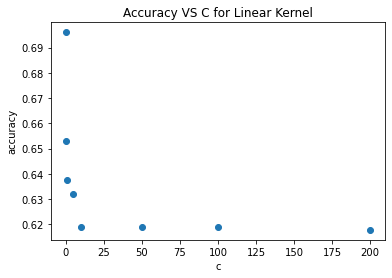

In [38]:
#train linear kernel
linear_acc = svc_cv(cv_folds, c, 'linear')
plt.scatter(c, linear_acc)
plt.xlabel('c')
plt.ylabel('accuracy')
plt.title('Accuracy VS C for Linear Kernel')
print(max(linear_acc), c[linear_acc.index(max(linear_acc))])

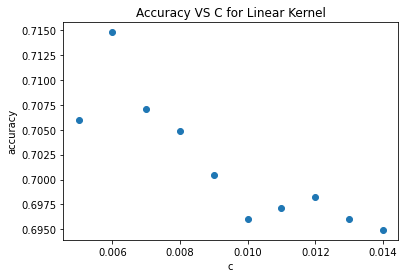

testing accuracy for linear kernel is:  0.7807017543859649 
best c is:  0.006


In [39]:
#focus on new range of c for linear
c_linear = np.arange(0.005, 0.015, 0.001)
linear_acc = svc_cv(cv_folds, c_linear, 'linear')
#plot
plt.scatter(c_linear, linear_acc)
plt.xlabel('c')
plt.ylabel('accuracy')
plt.title('Accuracy VS C for Linear Kernel')
plt.show()
#test
best_c_linear = c_linear[linear_acc.index(max(linear_acc))]
linear_test = svc(C = best_c_linear, kernel = 'linear')
linear_test.fit(x_test, y_test)
linear_test_acc = linear_test.score(x_test, y_test)
print('testing accuracy for linear kernel is: ', linear_test_acc, '\nbest c is: ', best_c_linear)

Poly kernel

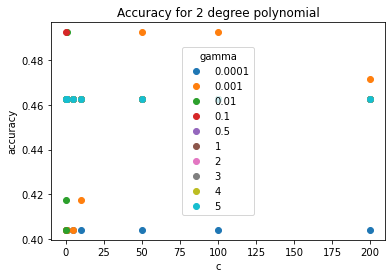

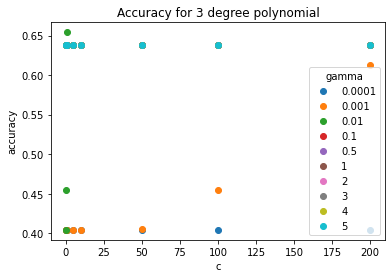

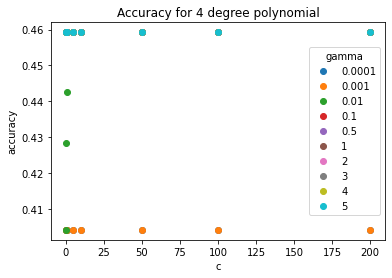

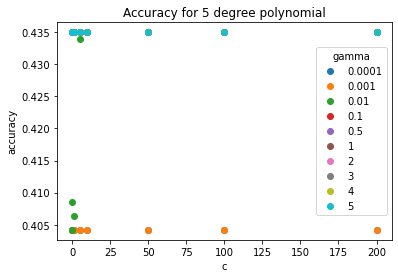

In [40]:
#train poly model
poly_acc = svc_cv(cv_folds, c, 'poly', gamma, degree)
# print(len(poly_acc))
for eachdegree in range(len(poly_acc)):
    degree_acc = poly_acc[eachdegree]
    for eachacc in range(len(poly_acc[eachdegree])):
        plt.scatter(c, degree_acc[eachacc], label = gamma[eachacc])
    plt.xlabel('c')
    plt.ylabel('accuracy')
    plt.legend(title = 'gamma')
    plt.title('Accuracy for '+ str(degree[eachdegree]) + ' degree polynomial')
    plt.show()

In [41]:
#find the degree that has the highest accuracy
degree_max_acc = list() #store the max accuracy for each degree
best_g_c = list() #store the g and c values of the highest accuracy for each degree
for eachd in poly_acc: #for each degree
    each_g_acc = list() #store the best accuracy for each degree
    for eachg in eachd: #for accuracy of each g value 
        each_g_acc.append(max(eachg)) #append the highest accuracy among c for current g and degree
    degree_max_acc.append(max(each_g_acc)) #append the highest accuracy for current degree
    best_g = gamma[each_g_acc.index(max(each_g_acc))] #find which gamma has the highest accuracy
    best_g_list = eachd[each_g_acc.index(max(each_g_acc))] #get accuracies of each c of current gamma
    best_c = c[best_g_list.index(max(each_g_acc))] #get which c has the highest accuracy
    best_g_c.append([best_g, best_c]) #append the best gamma and c values for this degree in a list
    
best_degree = degree[degree_max_acc.index(max(degree_max_acc))] #get the degree that has the best accuracy
print('max accuracy for each degree is: ', degree_max_acc)
print(best_degree)
print(best_g_c)

max accuracy for each degree is:  [0.49233804869163983, 0.6541922166231559, 0.4592495901888167, 0.4349948394147289]
3
[[0.001, 100], [0.01, 1], [0.01, 5], [0.01, 10]]


In [42]:
#new c and gamma
# c_new1 = np.arange(5, 16)
# gamma_new1 = np.arange(0.005, 0.015, 0.001)
# c_new2 = np.arange(150, 260, 10)
# gamma_new2 = np.arange(0.005, 0.015, 0.001)
# c_new3 = np.arange(0.5, 1.5, 0.1)
# gamma_new3 = np.arange(0.05, 0.11, 0.01)
# c_new4 = np.arange(0.05, 0.15, 0.01)
# gamma_new4 = np.arange(0.05, 0.15, 0.01)
c_new1 = np.arange(95, 106)
gamma_new1 = np.arange(0.0005, 0.0015, 0.0001)
c_new2 = np.arange(0.5, 1.5, 0.1)
gamma_new2 = np.arange(0.005, 0.015, 0.001)
c_new3 = np.arange(1, 10)
gamma_new3 = np.arange(0.005, 0.011, 0.001)
c_new4 = np.arange(5, 15)
gamma_new4 = np.arange(0.005, 0.015, 0.001)

c_new_all = [c_new1, c_new2, c_new3, c_new4]
gamma_new_all = [gamma_new1, gamma_new2, gamma_new3, gamma_new4]

#train with new hyperparameters
poly_all = list()
for eachnew in range(len(c_new_all)):
    pca_degree = int(eachnew+2)
    pca_degree = [pca_degree]
    new = svc_cv(cv_folds, c_new_all[eachnew], 'poly', gamma_new_all[eachnew], pca_degree) 
    poly_all.append(new)

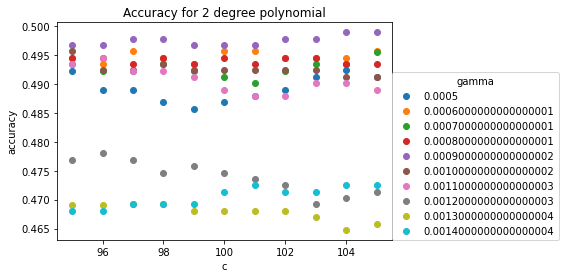

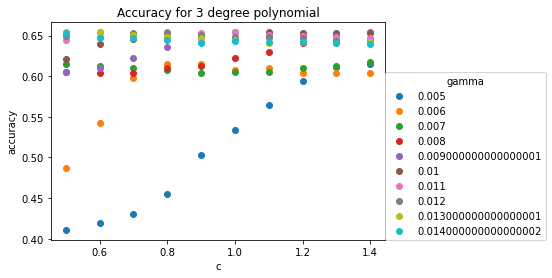

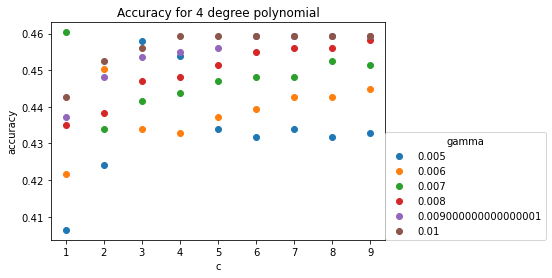

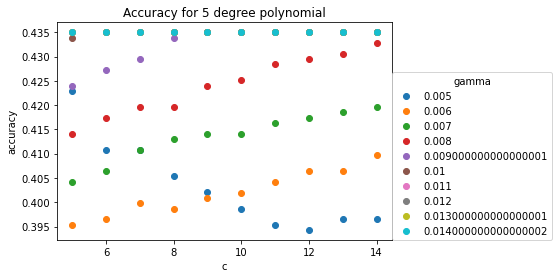

max accuracy for each degree is:  [0.498949669115415, 0.6541922166231559, 0.46037884767166537, 0.4349948394147289]
3
[[0.0009000000000000002, 104], [0.009000000000000001, 1.4], [0.007, 1], [0.009000000000000001, 9]]


In [43]:
# for eachdegree in range(len(poly_acc)):
#     degree_acc = poly_acc[eachdegree]
#     for eachacc in range(len(poly_acc[eachdegree])):
#         plt.scatter(c_poly, degree_acc[eachacc], label = gamma_poly[eachacc])
#     plt.xlabel('c')
#     plt.ylabel('accuracy')
#     plt.legend(title = 'gamma', loc = (1, 0))
#     plt.title('Accuracy for '+ str(degree[eachdegree]) + ' degree polynomial')
#     plt.show()
for eachdegree in range(len(poly_all)):
    degree_acc = poly_all[eachdegree][0]
    for eachacc in range(len(degree_acc)):
#         print(len(c_new_pca[eachdegree]), c_new_pca[eachdegree], np.arange(0.005, 0.025, 0.005))
#         print(len(degree_acc), len(degree_acc[eachacc]))
#         print(len(gamma_new_pca[eachdegree]))
        plt.scatter(c_new_all[eachdegree], degree_acc[eachacc], label = gamma_new_all[eachdegree][eachacc])
    plt.xlabel('c')
    plt.ylabel('accuracy')
    plt.legend(title = 'gamma', loc = (1, 0))
    plt.title('Accuracy for '+ str(degree[eachdegree]) + ' degree polynomial')
    plt.show()
    
#find the degree that has the highest accuracy
degree_max_acc = list() #store the max accuracy for each degree
best_g_c = list() #store the g and c values of the highest accuracy for each degree
for eachd_list in range(len(poly_all)): #for each degree
    eachd = poly_all[eachd_list][0]
    each_g_acc = list() #store the best accuracy for each degree
    for eachg in eachd: #for accuracy of each g value 
        each_g_acc.append(max(eachg)) #append the highest accuracy among c for current g and degree
    degree_max_acc.append(max(each_g_acc)) #append the highest accuracy for current degree
    best_g = gamma_new_all[eachd_list][each_g_acc.index(max(each_g_acc))] #find which gamma has the highest accuracy
    best_g_list = eachd[each_g_acc.index(max(each_g_acc))] #get accuracies of each c of current gamma
    best_c = c_new_all[eachd_list][best_g_list.index(max(each_g_acc))] #get which c has the highest accuracy
    best_g_c.append([best_g, best_c]) #append the best gamma and c values for this degree in a list
    
best_degree = degree[degree_max_acc.index(max(degree_max_acc))] #get the degree that has the best accuracy
print('max accuracy for each degree is: ', degree_max_acc)
print(best_degree)
print(best_g_c)

In [44]:
# #find the best c and gamma
# degree_max_acc = list() #store the max accuracy for each degree
# best_g_c = list() #store the g and c values of the highest accuracy for each degree
# for eachd in poly_acc: #for each degree
#     each_g_acc = list() #store the best accuracy for each degree
#     for eachg in eachd: #for accuracy of each g value 
#         each_g_acc.append(max(eachg)) #append the highest accuracy among c for current g and degree
#     degree_max_acc.append(max(each_g_acc)) #append the highest accuracy for current degree
#     best_g = gamma_poly[each_g_acc.index(max(each_g_acc))] #find which gamma has the highest accuracy
#     best_g_list = eachd[each_g_acc.index(max(each_g_acc))] #get accuracies of each c of current gamma
#     best_c = c_poly[best_g_list.index(max(each_g_acc))] #get which c has the highest accuracy
#     best_g_c.append([best_g, best_c]) #append the best gamma and c values for this degree in a list
    
# best_degree = degree[degree_max_acc.index(max(degree_max_acc))] #get the degree that has the best accuracy
# print('max accuracy for each degree is: ', degree_max_acc)
# print(best_degree)
# print(best_g_c)

#get testing accuracy for the best 
poly_test_accuracies = list()
for eachgc in range(len(best_g_c)):
    current_g_c = best_g_c[eachgc]
    poly = svc(C = current_g_c[1], gamma = current_g_c[0], degree = degree[eachgc], kernel = 'poly')
    poly.fit(x_test, y_test)
    poly_test_acc = poly.score(x_test, y_test)
    poly_test_accuracies.append(poly_test_acc)
#     print(current_g_c)
# print(best_g_c)
print(poly_test_accuracies)
print('the best degree is: ', degree[poly_test_accuracies.index(max(poly_test_accuracies))], 
      '\nthe highest testing accuracy is: ', max(poly_test_accuracies))

[0.9517543859649122, 0.9780701754385965, 0.6228070175438597, 1.0]
the best degree is:  5 
the highest testing accuracy is:  1.0


In [45]:
# #get testing accuracy for the best 
# poly_test_accuracies = list()
# for eachgc in range(len(best_g_c)):
#     current_g_c = best_g_c[eachgc]
#     poly = svc(C = current_g_c[1], gamma = current_g_c[0], degree = degree[eachgc], kernel = 'poly')
#     poly.fit(x_test, y_test)
#     poly_test_acc = poly.score(x_test, y_test)
#     poly_test_accuracies.append(poly_test_acc)
# print(poly_test_accuracies)
# print('the best degree is: ', degree[poly_test_accuracies.index(max(poly_test_accuracies))], 
#       '\nthe highest testing accuracy is: ', max(poly_test_accuracies))

rbf kernel

In [46]:
#train poly model
rbf_acc = svc_cv(cv_folds, c, 'rbf', gamma)

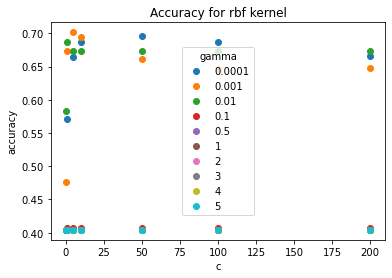

the highest accuracy is:  0.7015603181349038 
best gamma is:  0.001 
best c is:  5


In [47]:
#plot accuracy
gamma_acc_list = list()
for eachacc in range(len(rbf_acc)):
    plt.scatter(c, rbf_acc[eachacc], label = gamma[eachacc])
    gamma_acc_list.append(max(rbf_acc[eachacc]))
max_acc = max(gamma_acc_list)
best_gamma = gamma[gamma_acc_list.index(max_acc)]
best_gamma_acc = rbf_acc[gamma_acc_list.index(max_acc)]
best_c = c[best_gamma_acc.index(max_acc)]
plt.xlabel('c')
plt.ylabel('accuracy')
plt.legend(title = 'gamma')
plt.title('Accuracy for rbf kernel')
plt.show()
print('the highest accuracy is: ', max_acc, '\nbest gamma is: ', best_gamma, '\nbest c is: ', best_c)

In [48]:
#focus on new c and gamma
rbf_c = np.arange(1, 10)
rbf_gamma = np.arange(0.0005, 0.0015, 0.0001)
rbf_new = svc_cv(cv_folds, rbf_c, 'rbf', rbf_gamma)

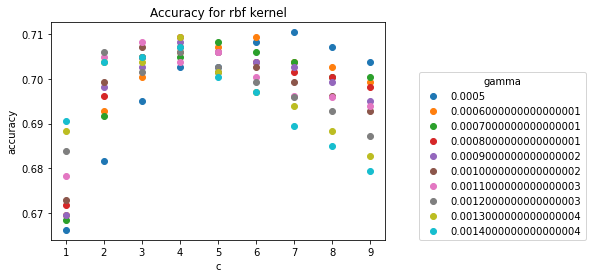

the highest accuracy is:  0.7103758120332706 
best gamma is:  0.0005 
best c is:  7


In [49]:
#plot new rbf
gamma_acc_list = list()
for eachacc in range(len(rbf_new)):
    plt.scatter(rbf_c, rbf_new[eachacc], label = rbf_gamma[eachacc])
    gamma_acc_list.append(max(rbf_new[eachacc]))
plt.xlabel('c')
plt.ylabel('accuracy')
plt.legend(title = 'gamma', loc = (1.1, 0))
plt.title('Accuracy for rbf kernel')
plt.show()
max_acc = max(gamma_acc_list)
best_gamma = rbf_gamma[gamma_acc_list.index(max_acc)]
best_gamma_acc = rbf_new[gamma_acc_list.index(max_acc)]
best_c = rbf_c[best_gamma_acc.index(max_acc)]
print('the highest accuracy is: ', max_acc, '\nbest gamma is: ', best_gamma, '\nbest c is: ', best_c)

In [50]:
#get testing accuracy for rbf
rbf_test = svc(C = best_c, gamma = best_gamma, kernel = 'rbf')
rbf_test.fit(x_test, y_test)
rbf_test_acc = rbf_test.score(x_test, y_test)
print('testing accuracy for rbf kernel is: ', rbf_test_acc)

testing accuracy for rbf kernel is:  0.8070175438596491


# train with selected features

modify training and testing sets

In [51]:
#change from all features to selected features
selected_cv_folds = list()
for eachfold in cv_folds:
    selected_x_tr = eachfold[0][feature_name]
    selected_x_ts = eachfold[2][feature_name]
    selected_cv_folds.append([selected_x_tr, eachfold[1], selected_x_ts, eachfold[3]])
selectedx_test = x_test[feature_name]

Linear kernel

highest accuracy is:  0.7257907838018336 
best c is:  0.1


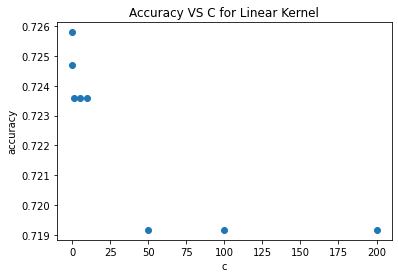

In [52]:
linear_acc = svc_cv(selected_cv_folds, c, 'linear')
plt.scatter(c, linear_acc)
plt.xlabel('c')
plt.ylabel('accuracy')
plt.title('Accuracy VS C for Linear Kernel')
print('highest accuracy is: ', max(linear_acc), '\nbest c is: ', c[linear_acc.index(max(linear_acc))])

0.725796855078623 best c:  0.2
best testing accuracy:  0.7368421052631579


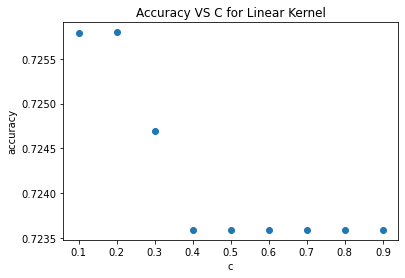

In [53]:
#focus on new range of c
c_linear = np.arange(0.1, 1, 0.1)
linear_acc = svc_cv(selected_cv_folds, c_linear, 'linear')
plt.scatter(c_linear, linear_acc)
plt.xlabel('c')
plt.ylabel('accuracy')
plt.title('Accuracy VS C for Linear Kernel')

#best c
best_c_linear = c_linear[linear_acc.index(max(linear_acc))]
print(max(linear_acc), 'best c: ', best_c_linear)
# print(linear_acc)

#test
linear_test = svc(C = best_c_linear, kernel = 'linear')
linear_test.fit(selectedx_test, y_test)
linear_test_acc = linear_test.score(selectedx_test, y_test)
print('best testing accuracy: ', linear_test_acc)

poly kernel

In [54]:
# c_selected = [0.001, 0.01, 0.1, 1, 5, 10, 50, 100]
# # c_selected = [0.001, 0.01, 0.1, 1]

# gamma_selected = [0.001, 0.01, 0.1, 1, 5, 10]

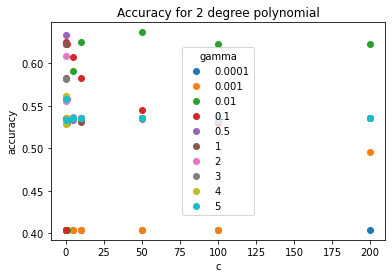

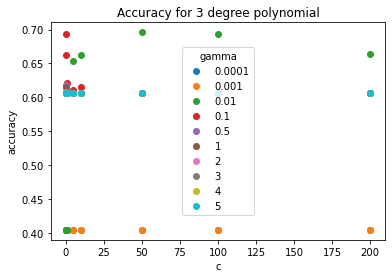

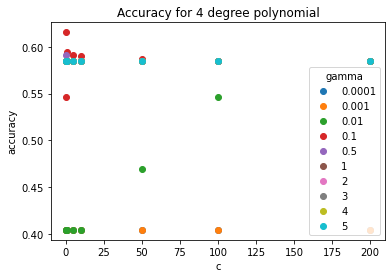

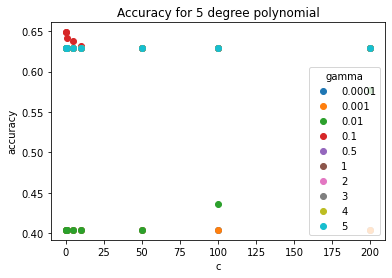

In [55]:
#train poly model
poly_acc = svc_cv(selected_cv_folds, c, 'poly', gamma, degree)

#plot accuracy
for eachdegree in range(len(poly_acc)):
    degree_acc = poly_acc[eachdegree]
    for eachacc in range(len(poly_acc[eachdegree])):
        plt.scatter(c, degree_acc[eachacc], label = gamma[eachacc])
    plt.xlabel('c')
    plt.ylabel('accuracy')
    plt.legend(title = 'gamma')
    plt.title('Accuracy for '+ str(degree[eachdegree]) + ' degree polynomial')
    plt.show()

In [56]:
#find the degree that has the highest accuracy
degree_max_acc = list() #store the max accuracy for each degree
best_g_c = list() #store the g and c values of the highest accuracy for each degree
for eachd in poly_acc: #for each degree
    each_g_acc = list() #store the best accuracy for each degree
    for eachg in eachd: #for accuracy of each g value 
        each_g_acc.append(max(eachg)) #append the highest accuracy among c for current g and degree
    degree_max_acc.append(max(each_g_acc)) #append the highest accuracy for current degree
    best_g = gamma[each_g_acc.index(max(each_g_acc))] #find which gamma has the highest accuracy
    best_g_list = eachd[each_g_acc.index(max(each_g_acc))] #get accuracies of each c of current gamma
    best_c = c[best_g_list.index(max(each_g_acc))] #get which c has the highest accuracy
    best_g_c.append([best_g, best_c]) #append the best gamma and c values for this degree in a list
    
best_degree = degree[degree_max_acc.index(max(degree_max_acc))] #get the degree that has the best accuracy
print('max accuracy for each degree is: ', degree_max_acc)
print(best_degree)
print(best_g_c)

max accuracy for each degree is:  [0.6365612288264222, 0.6960961690243458, 0.6156881792240908, 0.6486673547447028]
3
[[0.01, 50], [0.01, 50], [0.1, 0.1], [0.1, 0.01]]


In [57]:
#new c and gamma
# c_new1 = np.arange(95, 106)
# gamma_new1 = np.arange(0.005, 0.015, 0.001)
# c_new2 = np.arange(0.005, 0.015, 0.001)
# gamma_new2 = np.arange(0.1, 1, 0.1)
# c_new3 = np.arange(0.5, 1.5, 0.1)
# gamma_new3 = np.arange(0.05, 0.15, 0.01)
# c_new4 = np.arange(35, 80, 5)
# gamma_new4 = np.arange(0.05, 0.15, 0.01)
c_new1 = np.arange(40, 61)
gamma_new1 = np.arange(0.005, 0.015, 0.001)
c_new2 = np.arange(40, 61)
gamma_new2 = np.arange(0.005, 0.015, 0.001)
c_new3 = np.arange(0.05, 0.15, 0.01)
gamma_new3 = np.arange(0.05, 0.15, 0.01)
c_new4 = np.arange(0.005, 0.015, 0.001)
gamma_new4 = np.arange(0.05, 0.15, 0.01)

c_new_selected = [c_new1, c_new2, c_new3, c_new4]
gamma_new_selected = [gamma_new1, gamma_new2, gamma_new3, gamma_new4]

#train with new hyperparameters
poly_selected = list()
for eachnew in range(len(c_new_selected)):
    pca_degree = int(eachnew+2)
    pca_degree = [pca_degree]
    new = svc_cv(selected_cv_folds, c_new_selected[eachnew], 'poly', gamma_new_selected[eachnew], pca_degree) 
    poly_selected.append(new)

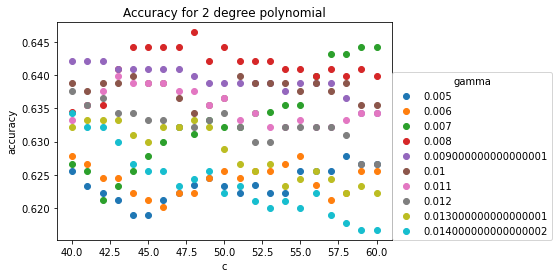

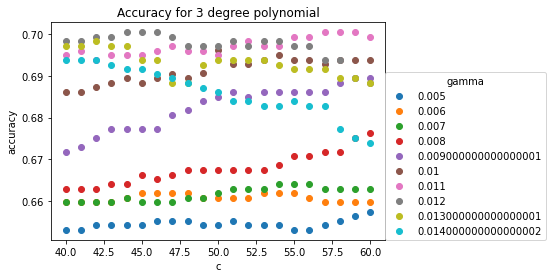

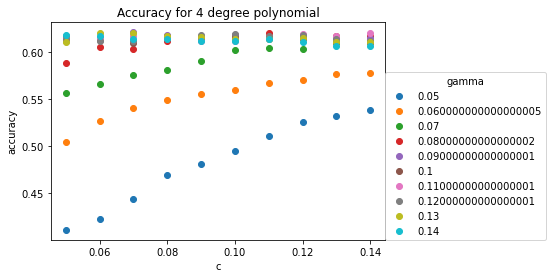

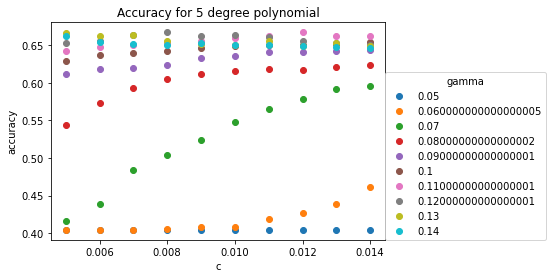

max accuracy for each degree is:  [0.6464574099933216, 0.7004553457592132, 0.6211644708882278, 0.6674154574707061]
3
[[0.008, 48], [0.011, 57], [0.09000000000000001, 0.07], [0.11000000000000001, 0.012]]


In [58]:
#plot new acc
for eachdegree in range(len(poly_selected)):
    degree_acc = poly_selected[eachdegree][0]
    for eachacc in range(len(degree_acc)):
        plt.scatter(c_new_selected[eachdegree], degree_acc[eachacc], label = gamma_new_selected[eachdegree][eachacc])
    plt.xlabel('c')
    plt.ylabel('accuracy')
    plt.legend(title = 'gamma', loc = (1, 0))
    plt.title('Accuracy for '+ str(degree[eachdegree]) + ' degree polynomial')
    plt.show()
    
#find the degree that has the highest accuracy
degree_max_acc = list() #store the max accuracy for each degree
best_g_c = list() #store the g and c values of the highest accuracy for each degree
for eachd_list in range(len(poly_selected)): #for each degree
    eachd = poly_selected[eachd_list][0]
    each_g_acc = list() #store the best accuracy for each degree
    for eachg in eachd: #for accuracy of each g value 
        each_g_acc.append(max(eachg)) #append the highest accuracy among c for current g and degree
    degree_max_acc.append(max(each_g_acc)) #append the highest accuracy for current degree
    best_g = gamma_new_selected[eachd_list][each_g_acc.index(max(each_g_acc))] #find which gamma has the highest accuracy
    best_g_list = eachd[each_g_acc.index(max(each_g_acc))] #get accuracies of each c of current gamma
    best_c = c_new_selected[eachd_list][best_g_list.index(max(each_g_acc))] #get which c has the highest accuracy
    best_g_c.append([best_g, best_c]) #append the best gamma and c values for this degree in a list
    
best_degree = degree[degree_max_acc.index(max(degree_max_acc))] #get the degree that has the best accuracy
print('max accuracy for each degree is: ', degree_max_acc)
print(best_degree)
print(best_g_c)

In [59]:
#get testing accuracy for the best 
poly_test_accuracies = list()
for eachgc in range(len(best_g_c)):
    current_g_c = best_g_c[eachgc]
    poly = svc(C = current_g_c[1], gamma = current_g_c[0], degree = degree[eachgc], kernel = 'poly')
    poly.fit(selectedx_test, y_test)
    poly_test_acc = poly.score(selectedx_test, y_test)
    poly_test_accuracies.append(poly_test_acc)
#     print(current_g_c)
# print(best_g_c)
print(poly_test_accuracies)
print('the best degree is: ', degree[poly_test_accuracies.index(max(poly_test_accuracies))], 
      '\nthe highest testing accuracy is: ', max(poly_test_accuracies))

[0.8464912280701754, 0.7807017543859649, 0.868421052631579, 0.868421052631579]
the best degree is:  4 
the highest testing accuracy is:  0.868421052631579


rbf kernel

In [60]:
rbf_acc = svc_cv(selected_cv_folds, c, 'rbf', gamma)

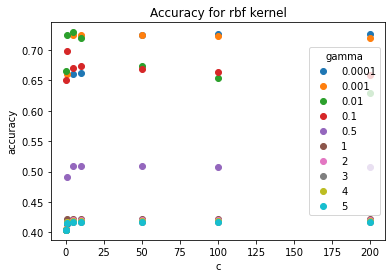

the highest accuracy is:  0.7290996296521158 
best gamma is:  0.01 
best c is:  5


In [61]:
#plot accuracy
gamma_acc_list = list()
for eachacc in range(len(rbf_acc)):
    plt.scatter(c, rbf_acc[eachacc], label = gamma[eachacc])
    gamma_acc_list.append(max(rbf_acc[eachacc]))
max_acc = max(gamma_acc_list)
best_gamma = gamma[gamma_acc_list.index(max_acc)]
best_gamma_acc = rbf_acc[gamma_acc_list.index(max_acc)]
best_c = c[best_gamma_acc.index(max_acc)]
plt.xlabel('c')
plt.ylabel('accuracy')
plt.legend(title = 'gamma')
plt.title('Accuracy for rbf kernel')
plt.show()
print('the highest accuracy is: ', max_acc, '\nbest gamma is: ', best_gamma, '\nbest c is: ', best_c)

In [62]:
#new c and gamma
c_rbf = np.arange(1, 10)
gamma_rbf = np.arange(0.005, 0.015, 0.001)
rbf_acc = svc_cv(selected_cv_folds, c_rbf, 'rbf', gamma_rbf)

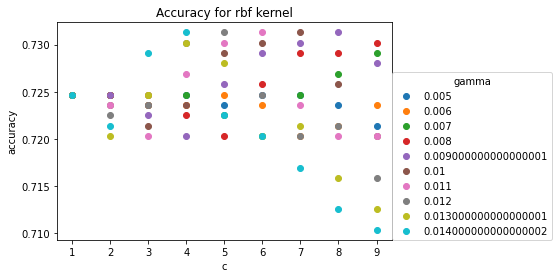

the highest accuracy is:  0.7313035031267076 
best gamma is:  0.009000000000000001 
best c is:  8


In [63]:
#plot accuracy
gamma_acc_list = list()
for eachacc in range(len(rbf_acc)):
    plt.scatter(c_rbf, rbf_acc[eachacc], label = gamma_rbf[eachacc])
    gamma_acc_list.append(max(rbf_acc[eachacc]))
max_acc = max(gamma_acc_list)
best_gamma = gamma_rbf[gamma_acc_list.index(max_acc)]
best_gamma_acc = rbf_acc[gamma_acc_list.index(max_acc)]
best_c = c_rbf[best_gamma_acc.index(max_acc)]
plt.xlabel('c')
plt.ylabel('accuracy')
plt.legend(title = 'gamma', loc = (1, 0))
plt.title('Accuracy for rbf kernel')
plt.show()
print('the highest accuracy is: ', max_acc, '\nbest gamma is: ', best_gamma, '\nbest c is: ', best_c)

In [64]:
#testing rbf
rbf_test = svc(C = best_c, gamma = best_gamma, kernel = 'rbf')
rbf_test.fit(selectedx_test, y_test)
rbf_test_acc = rbf_test.score(selectedx_test, y_test)
print('the test accuracy for rbf kernel is: ', rbf_test_acc)

the test accuracy for rbf kernel is:  0.7456140350877193


# with PCA Features

split into training, testing, and CV folds

In [65]:
#split into train and test set
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(df_pca, y, test_size = 0.2, random_state = 0)

#split into cv folds
x_folds_pca = np.array_split(x_train_pca, n_fold) #split training data into n_fold proportions
y_folds_pca = np.array_split(y_train_pca, n_fold) #split training data into n_fold proportions

cv_folds_pca = list() #stores dataframes for each fold
for eachfold in range(n_fold): #for each fold
    train_number = list(np.arange(0, n_fold)) #a list of fold numbers
    train_number.pop(eachfold) #pop current fold number
    df_y_ts = y_folds_pca[eachfold] #use current fold number as testing fold, create testing y
    df_x_ts = x_folds_pca[eachfold] #use current fold number as testing fold, create testing x
    
    y_train_list = list() #stores all the df y from folds for training
    x_train_list = list() #stores all the df x from folds for training
    for eachnumber in train_number: #for each training fold number
        x_train_list.append(x_folds_pca[eachnumber]) #append the df in training fold number for x
        y_train_list.append(y_folds_pca[eachnumber]) #append the df in training fold number for y
    df_x_tr = pd.concat(x_train_list) #combine all the training dfs for x into 1
    df_y_tr = pd.concat(y_train_list) #combine all the training dfs for y into 1
    cv_folds_pca.append([df_x_tr, df_y_tr, df_x_ts, df_y_ts]) #append training and testing dataframe for current fold

linear kernel

highest accuracy is:  0.6707425171513569 
best c is:  0.01


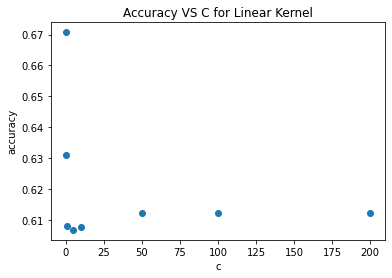

In [66]:
linear_pca = svc_cv(cv_folds_pca, c, 'linear')
plt.scatter(c, linear_pca)
plt.xlabel('c')
plt.ylabel('accuracy')
plt.title('Accuracy VS C for Linear Kernel')

linear_acc_pca = max(linear_pca)
best_c_pca = c[linear_pca.index(max(linear_pca))]
print('highest accuracy is: ', linear_acc_pca, '\nbest c is: ', best_c_pca)

highest accuracy is:  0.6817497419707365 
best c is:  0.006


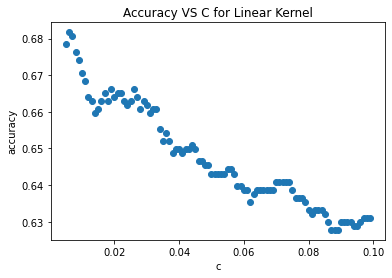

In [67]:
#new c
c_pca = np.arange(0.005, 0.1, 0.001)
linear_pca = svc_cv(cv_folds_pca, c_pca, 'linear')
plt.scatter(c_pca, linear_pca)
plt.xlabel('c')
plt.ylabel('accuracy')
plt.title('Accuracy VS C for Linear Kernel')

linear_acc_pca = max(linear_pca)
best_c_pca = c_pca[linear_pca.index(max(linear_pca))]
print('highest accuracy is: ', linear_acc_pca, '\nbest c is: ', best_c_pca)

In [68]:
#test accuracy
linear_test_pca = svc(C = best_c_pca, kernel = 'linear')
linear_test_pca.fit(x_test_pca, y_test_pca)
linear_tsacc_pca = linear_test_pca.score(x_test_pca, y_test_pca)
print('the test accuracy for rbf kernel is: ', linear_tsacc_pca)

the test accuracy for rbf kernel is:  0.7763157894736842


poly kernel

In [69]:
poly_pca = svc_cv(cv_folds_pca, c, 'poly', gamma, degree)

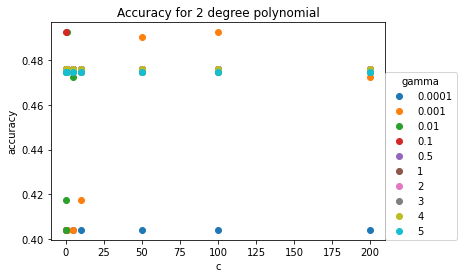

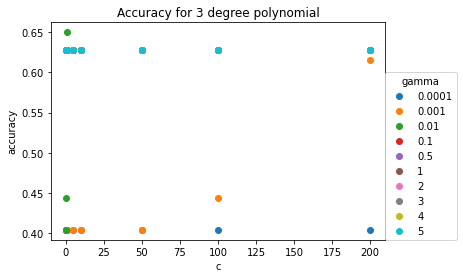

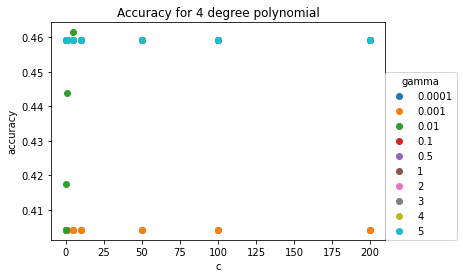

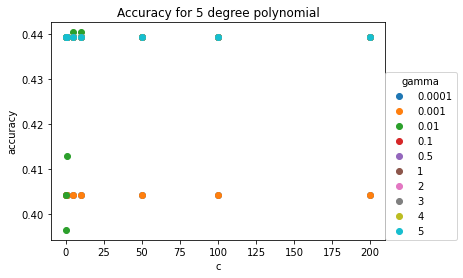

max accuracy for each degree is:  [0.4923501912452189, 0.6497905409507619, 0.46147774877056646, 0.44049541618602395]
3
[[0.001, 100], [0.01, 1], [0.01, 5], [0.01, 10]]


In [70]:
#plot accuracy
for eachdegree in range(len(poly_pca)):
    degree_acc = poly_pca[eachdegree]
    for eachacc in range(len(poly_pca[eachdegree])):
        plt.scatter(c, degree_acc[eachacc], label = gamma[eachacc])
    plt.xlabel('c')
    plt.ylabel('accuracy')
    plt.legend(title = 'gamma', loc = (1, 0))
    plt.title('Accuracy for '+ str(degree[eachdegree]) + ' degree polynomial')
    plt.show()
    
#find the degree that has the highest accuracy
degree_max_acc = list() #store the max accuracy for each degree
best_g_c = list() #store the g and c values of the highest accuracy for each degree
for eachd in poly_pca: #for each degree
    each_g_acc = list() #store the best accuracy for each degree
    for eachg in eachd: #for accuracy of each g value 
        each_g_acc.append(max(eachg)) #append the highest accuracy among c for current g and degree
    degree_max_acc.append(max(each_g_acc)) #append the highest accuracy for current degree
    best_g = gamma[each_g_acc.index(max(each_g_acc))] #find which gamma has the highest accuracy
    best_g_list = eachd[each_g_acc.index(max(each_g_acc))] #get accuracies of each c of current gamma
    best_c = c[best_g_list.index(max(each_g_acc))] #get which c has the highest accuracy
    best_g_c.append([best_g, best_c]) #append the best gamma and c values for this degree in a list
    
best_degree = degree[degree_max_acc.index(max(degree_max_acc))] #get the degree that has the best accuracy
print('max accuracy for each degree is: ', degree_max_acc)
print(best_degree)
print(best_g_c)

In [71]:
#new c and gamma
# c_new1 = np.arange(5, 16)
# gamma_new1 = np.arange(0.005, 0.015, 0.001)
# c_new2 = np.arange(150, 260, 10)
# gamma_new2 = np.arange(0.005, 0.015, 0.001)
# c_new3 = np.arange(0.05, 0.15, 0.01)
# gamma_new3 = np.arange(0.05, 0.15, 0.01)
# c_new4 = np.arange(0.05, 0.15, 0.01)
# gamma_new4 = np.arange(0.05, 0.15, 0.01)
c_new1 = np.arange(95, 106)
gamma_new1 = np.arange(0.0005, 0.0015, 0.0001)
c_new2 = np.arange(0.1, 2, 0.1)
gamma_new2 = np.arange(0.005, 0.015, 0.001)
c_new3 = np.arange(40, 61)
gamma_new3 = np.arange(0.005, 0.015, 0.001)
c_new4 = np.arange(1, 20)
gamma_new4 = np.arange(0.005, 0.015, 0.001)

c_new_pca = [c_new1, c_new2, c_new3, c_new4]
gamma_new_pca = [gamma_new1, gamma_new2, gamma_new3, gamma_new4]

#train with new hyperparameters
poly_pca = list()
for eachnew in range(len(c_new_pca)):
    pca_degree = int(eachnew+2)
    pca_degree = [pca_degree]
    new = svc_cv(cv_folds_pca, c_new_pca[eachnew], 'poly', gamma_new_pca[eachnew], pca_degree) 
    poly_pca.append(new)

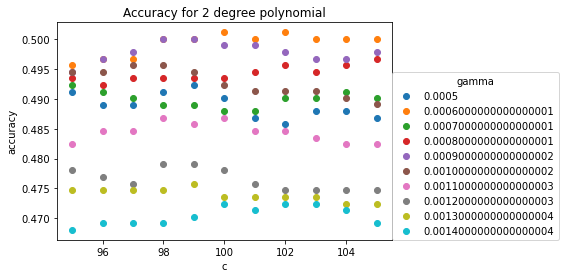

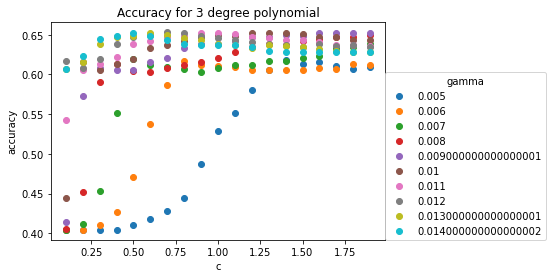

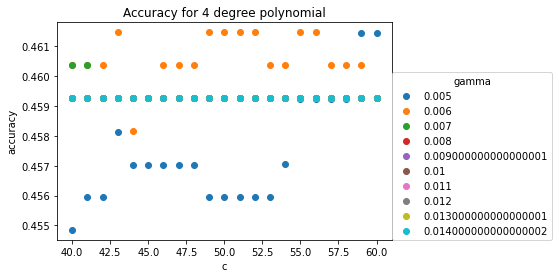

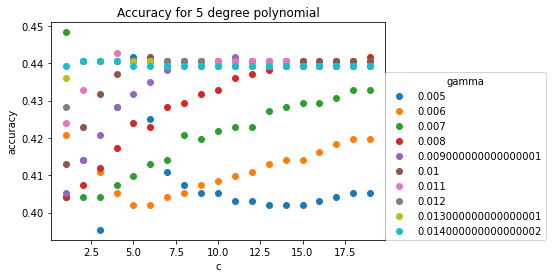

max accuracy for each degree is:  [0.5011353287596382, 0.6530811729706757, 0.46147774877056646, 0.4483273632444903]
3
[[0.0006000000000000001, 102], [0.012, 0.7000000000000001], [0.006, 43], [0.007, 1]]


In [72]:
#plot new acc
for eachdegree in range(len(poly_pca)):
    degree_acc = poly_pca[eachdegree][0]
    for eachacc in range(len(degree_acc)):
        plt.scatter(c_new_pca[eachdegree], degree_acc[eachacc], label = gamma_new_pca[eachdegree][eachacc])
    plt.xlabel('c')
    plt.ylabel('accuracy')
    plt.legend(title = 'gamma', loc = (1, 0))
    plt.title('Accuracy for '+ str(degree[eachdegree]) + ' degree polynomial')
    plt.show()
    
#find the degree that has the highest accuracy
degree_max_acc = list() #store the max accuracy for each degree
best_g_c = list() #store the g and c values of the highest accuracy for each degree
for eachd_list in range(len(poly_pca)): #for each degree
    eachd = poly_pca[eachd_list][0]
    each_g_acc = list() #store the best accuracy for each degree
    for eachg in eachd: #for accuracy of each g value 
        each_g_acc.append(max(eachg)) #append the highest accuracy among c for current g and degree
    degree_max_acc.append(max(each_g_acc)) #append the highest accuracy for current degree
    best_g = gamma_new_pca[eachd_list][each_g_acc.index(max(each_g_acc))] #find which gamma has the highest accuracy
    best_g_list = eachd[each_g_acc.index(max(each_g_acc))] #get accuracies of each c of current gamma
    best_c = c_new_pca[eachd_list][best_g_list.index(max(each_g_acc))] #get which c has the highest accuracy
    best_g_c.append([best_g, best_c]) #append the best gamma and c values for this degree in a list
    
best_degree = degree[degree_max_acc.index(max(degree_max_acc))] #get the degree that has the best accuracy
print('max accuracy for each degree is: ', degree_max_acc)
print(best_degree)
print(best_g_c)

In [73]:
#get testing accuracy for the best 
poly_test_accuracies = list()
for eachgc in range(len(best_g_c)):
    current_g_c = best_g_c[eachgc]
    poly = svc(C = current_g_c[1], gamma = current_g_c[0], degree = degree[eachgc], kernel = 'poly')
    poly.fit(x_test_pca, y_test_pca)
    poly_test_acc = poly.score(x_test_pca, y_test_pca)
    poly_test_accuracies.append(poly_test_acc)
print(poly_test_accuracies)
print('the best degree is: ', degree[poly_test_accuracies.index(max(poly_test_accuracies))], 
      '\nthe highest testing accuracy is: ', max(poly_test_accuracies))

[0.6096491228070176, 0.9649122807017544, 1.0, 0.5570175438596491]
the best degree is:  4 
the highest testing accuracy is:  1.0


rbf kernel

In [74]:
rbf_pca = svc_cv(cv_folds_pca, c, 'rbf', gamma)

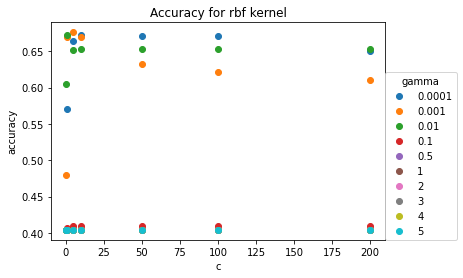

the highest accuracy is:  0.6762491651994414 
best gamma is:  0.001 
best c is:  5


In [75]:
#plot accuracy
gamma_acc_list = list()
for eachacc in range(len(rbf_pca)):
    plt.scatter(c, rbf_pca[eachacc], label = gamma[eachacc])
    gamma_acc_list.append(max(rbf_pca[eachacc]))
max_acc = max(gamma_acc_list)
best_gamma = gamma[gamma_acc_list.index(max_acc)]
best_gamma_acc = rbf_pca[gamma_acc_list.index(max_acc)]
best_c = c[best_gamma_acc.index(max_acc)]
plt.xlabel('c')
plt.ylabel('accuracy')
plt.legend(title = 'gamma', loc = (1,0))
plt.title('Accuracy for rbf kernel')
plt.show()
print('the highest accuracy is: ', max_acc, '\nbest gamma is: ', best_gamma, '\nbest c is: ', best_c)

In [76]:
#new c and gamma
c_rbf = np.arange(1, 10)
gamma_rbf = np.arange(0.0005, 0.0015, 0.0001)
rbf_pca = svc_cv(cv_folds_pca, c_rbf, 'rbf', gamma_rbf)

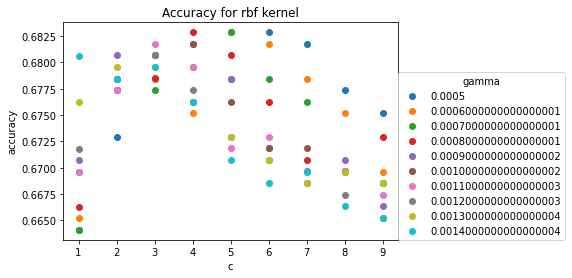

the highest accuracy is:  0.6828547143464271 
best gamma is:  0.0007000000000000001 
best c is:  5


In [77]:
#plot accuracy
gamma_acc_list = list()
for eachacc in range(len(rbf_pca)):
    plt.scatter(c_rbf, rbf_pca[eachacc], label = gamma_rbf[eachacc])
    gamma_acc_list.append(max(rbf_pca[eachacc]))
max_acc = max(gamma_acc_list)
best_gamma = gamma_rbf[gamma_acc_list.index(max_acc)]
best_gamma_acc = rbf_pca[gamma_acc_list.index(max_acc)]
best_c = c_rbf[best_gamma_acc.index(max_acc)]
plt.xlabel('c')
plt.ylabel('accuracy')
plt.legend(title = 'gamma', loc = (1, 0))
plt.title('Accuracy for rbf kernel')
plt.show()
print('the highest accuracy is: ', max_acc, '\nbest gamma is: ', best_gamma, '\nbest c is: ', best_c)

In [78]:
#testing rbf
rbf_test = svc(C = best_c, gamma = best_gamma, kernel = 'rbf')
rbf_test.fit(x_test_pca, y_test_pca)
rbf_test_acc = rbf_test.score(x_test_pca, y_test_pca)
print('the test accuracy for rbf kernel is: ', rbf_test_acc)

the test accuracy for rbf kernel is:  0.7807017543859649


# question 2: reach for help?

Set up x, y, train and test data

In [79]:
# df_read2 = pd.read_csv('../input/mental-health-in-tech-field-eda-cleaning/main_dummy2.csv')
# df_read2 = df_read2.drop('Unnamed: 0', axis = 1)
# df_dummies2 = df_read2.copy()
# print(df_dummies2.shape)

In [80]:
# cols2 = df_dummies2.columns.values
# ycol2 = 'Have you ever sought treatment for a mental health issue from a mental health professional?'
# xcol2 = list()
# for each in cols2:
#     if each != ycol:
#         xcol2.append(each)
# y2 = df_dummies2[ycol2]
# x2 = df_dummies2[xcol2]
# x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size = 0.2, random_state = 0)

Further split into train and test for CV

In [81]:
# n_fold = 5
# x_folds2 = np.array_split(x_train2, n_fold) #split training data into n_fold proportions
# y_folds2 = np.array_split(y_train2, n_fold) #split training data into n_fold proportions

# cv_folds2 = list() #stores dataframes for each fold
# for eachfold in range(n_fold): #for each fold
#     train_number = list(np.arange(0, n_fold)) #a list of fold numbers
#     train_number.pop(eachfold) #pop current fold number
# #     print(train_number)
#     df_y_ts = y_folds2[eachfold] #use current fold number as testing fold, create testing y
#     df_x_ts = x_folds2[eachfold] #use current fold number as testing fold, create testing x
#     y_train_list = list() #stores all the df y from folds for training
#     x_train_list = list() #stores all the df x from folds for training
#     for eachnumber in train_number: #for each training fold number
#         x_train_list.append(x_folds2[eachnumber]) #append the df in training fold number for x
#         y_train_list.append(y_folds2[eachnumber]) #append the df in training fold number for y
#     df_x_tr = pd.concat(x_train_list) #combine all the training dfs for x into 1
#     df_y_tr = pd.concat(y_train_list) #combine all the training dfs for y into 1
#     cv_folds2.append([df_x_tr, df_y_tr, df_x_ts, df_y_ts]) #append training and testing dataframe for current fold

# use all features

In [82]:
# from math import exp

Starting parameters

In [83]:
# c = [0.01, 0.1, 1, 5, 10, 50, 100, 200] #c for all kernels
# gamma = [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 2, 3, 4, 5] #for rbf and poly
# degree = [2, 3, 4, 5] #for poly kernel

linear kernel

In [84]:
# linear_acc = svc_cv(cv_folds2, c, 'linear')
# plt.scatter(c, linear_acc)
# plt.xlabel('c')
# plt.ylabel('accuracy')
# plt.title('Accuracy VS C for Linear Kernel')
# print('highest accuracy is: ', max(linear_acc), '\nbest c is: ', c[linear_acc.index(max(linear_acc))])

rbf kernel

In [85]:
# rbf_acc = svc_cv(cv_folds2, c, 'rbf', gamma)

In [86]:
# #plot accuracy
# gamma_acc_list = list()
# for eachacc in range(len(rbf_acc)):
#     plt.scatter(c, rbf_acc[eachacc], label = gamma[eachacc])
#     gamma_acc_list.append(max(rbf_acc[eachacc]))
# max_acc = max(gamma_acc_list)
# best_gamma = gamma[gamma_acc_list.index(max_acc)]
# best_gamma_acc = rbf_acc[gamma_acc_list.index(max_acc)]
# best_c = c[best_gamma_acc.index(max_acc)]
# plt.xlabel('c')
# plt.ylabel('accuracy')
# plt.legend(title = 'gamma')
# plt.title('Accuracy for rbf kernel')
# plt.show()
# print('the highest accuracy is: ', max_acc, '\nbest gamma is: ', best_gamma, '\nbest c is: ', best_c)

In [87]:
# #new gamma and c
# # gamma_linear2 = np.arange(0.0001, 0.001, 0.0001)
# c_linear2 = np.arange(50, 100)
# rbf_acc = svc_cv(cv_folds2, c_linear2, 'rbf', [best_gamma])

In [88]:
# #plot accuracy
# gamma_acc_list = list()
# for eachacc in range(len(rbf_acc)):
#     plt.scatter(c_linear2, rbf_acc[eachacc], label = gamma[eachacc])
#     gamma_acc_list.append(max(rbf_acc[eachacc]))
# max_acc = max(gamma_acc_list)
# best_gamma = gamma[gamma_acc_list.index(max_acc)]
# best_gamma_acc = rbf_acc[gamma_acc_list.index(max_acc)]
# best_c = c_linear2[best_gamma_acc.index(max_acc)]
# plt.xlabel('c')
# plt.ylabel('accuracy')
# plt.legend(title = 'gamma')
# plt.title('Accuracy for rbf kernel')
# plt.show()
# print('the highest accuracy is: ', max_acc, '\nbest gamma is: ', best_gamma, '\nbest c is: ', best_c)

In [89]:
# #test accuracy
# rbf_test2 = svc(C = best_c, gamma = best_gamma, kernel = 'rbf')
# rbf_test2.fit(x_test, y_test)
# rbf_test_acc2 = rbf_test2.score(x_test, y_test)
# print('testing accuracy is: ', rbf_test_acc2)

Poly kernel

In [90]:
# poly_test2 = svc_cv(cv_folds2, c, 'poly', gamma, degree)

In [91]:
# #plot result
# for eachdegree in range(len(poly_acc)):
#     degree_acc = poly_acc[eachdegree]
#     for eachacc in range(len(poly_acc[eachdegree])):
#         plt.scatter(c, degree_acc[eachacc], label = gamma[eachacc])
#     plt.xlabel('c')
#     plt.ylabel('accuracy')
#     plt.legend(title = 'gamma')
#     plt.title('Accuracy for '+ str(degree[eachdegree]) + ' degree polynomial')
#     plt.show()

In [92]:
# #find the best c and gamma for each degree
# degree_max_acc = list() #store the max accuracy for each degree
# best_g_c = list() #store the g and c values of the highest accuracy for each degree
# for eachd in poly_acc: #for each degree
#     each_g_acc = list() #store the best accuracy for each degree
#     for eachg in eachd: #for accuracy of each g value 
#         each_g_acc.append(max(eachg)) #append the highest accuracy among c for current g and degree
#     degree_max_acc.append(max(each_g_acc)) #append the highest accuracy for current degree
#     best_g = gamma[each_g_acc.index(max(each_g_acc))] #find which gamma has the highest accuracy
#     best_g_list = eachd[each_g_acc.index(max(each_g_acc))] #get accuracies of each c of current gamma
#     best_c = c[best_g_list.index(max(each_g_acc))] #get which c has the highest accuracy
#     best_g_c.append([best_g, best_c]) #append the best gamma and c values for this degree in a list
    
# best_degree = degree[degree_max_acc.index(max(degree_max_acc))] #get the degree that has the best accuracy
# print('max accuracy for each degree is: ', degree_max_acc)
# print(best_degree)
# print(best_g_c)

# Summary

Q1:

Best Accuracy: 1.0

Kernel: Poly

Degree: 4

Features: all